In [1]:
import pandas as pd
import scanpy as sc
import os
import anndata as ad
import logging

os.chdir('../')
logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )

/home/xlv0877/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx

In [2]:
# Load datasets config
meta = pd.read_csv('resources/datasets/meta/Replogle_datasets.csv')

In [3]:
data_dir = '/home/xlv0877/proj_home/dl/perturb-seq/data/processed'.rstrip('/')
filenames = meta['publication index'].astype(str) + '_' + meta['dataset index'].astype(str) + '.h5ad'
filenames = data_dir + '/' + filenames

In [10]:
obs = []
var = []
names = []
for filename in filenames:
    name = os.path.basename(filename).rstrip('.h5ad')
    names.append(name)
    print(f'Adding {name}')
    adata = sc.read(filename, backed='r')
    # Collect obs
    _obs = adata.obs.copy()
    _obs['dataset'] = name
    obs.append(_obs)
    # Collect var
    var.append(adata.var)
    # Close connection
    adata.file.close()

Adding ReplogleWeissman2022_K562_essential
Adding ReplogleWeissman2022_rpe1
Adding ReplogleWeissman2025_HepG2
Adding ReplogleWeissman2025_Jurkat


In [5]:
all_genes = [set(v.index) for v in var]
union_genes = set.union(*all_genes)
intersection_genes = set.intersection(*all_genes)

print(f'Total unique genes: {len(union_genes)}, intersection: {len(intersection_genes)}')

Total unique genes: 11909, intersection: 6640


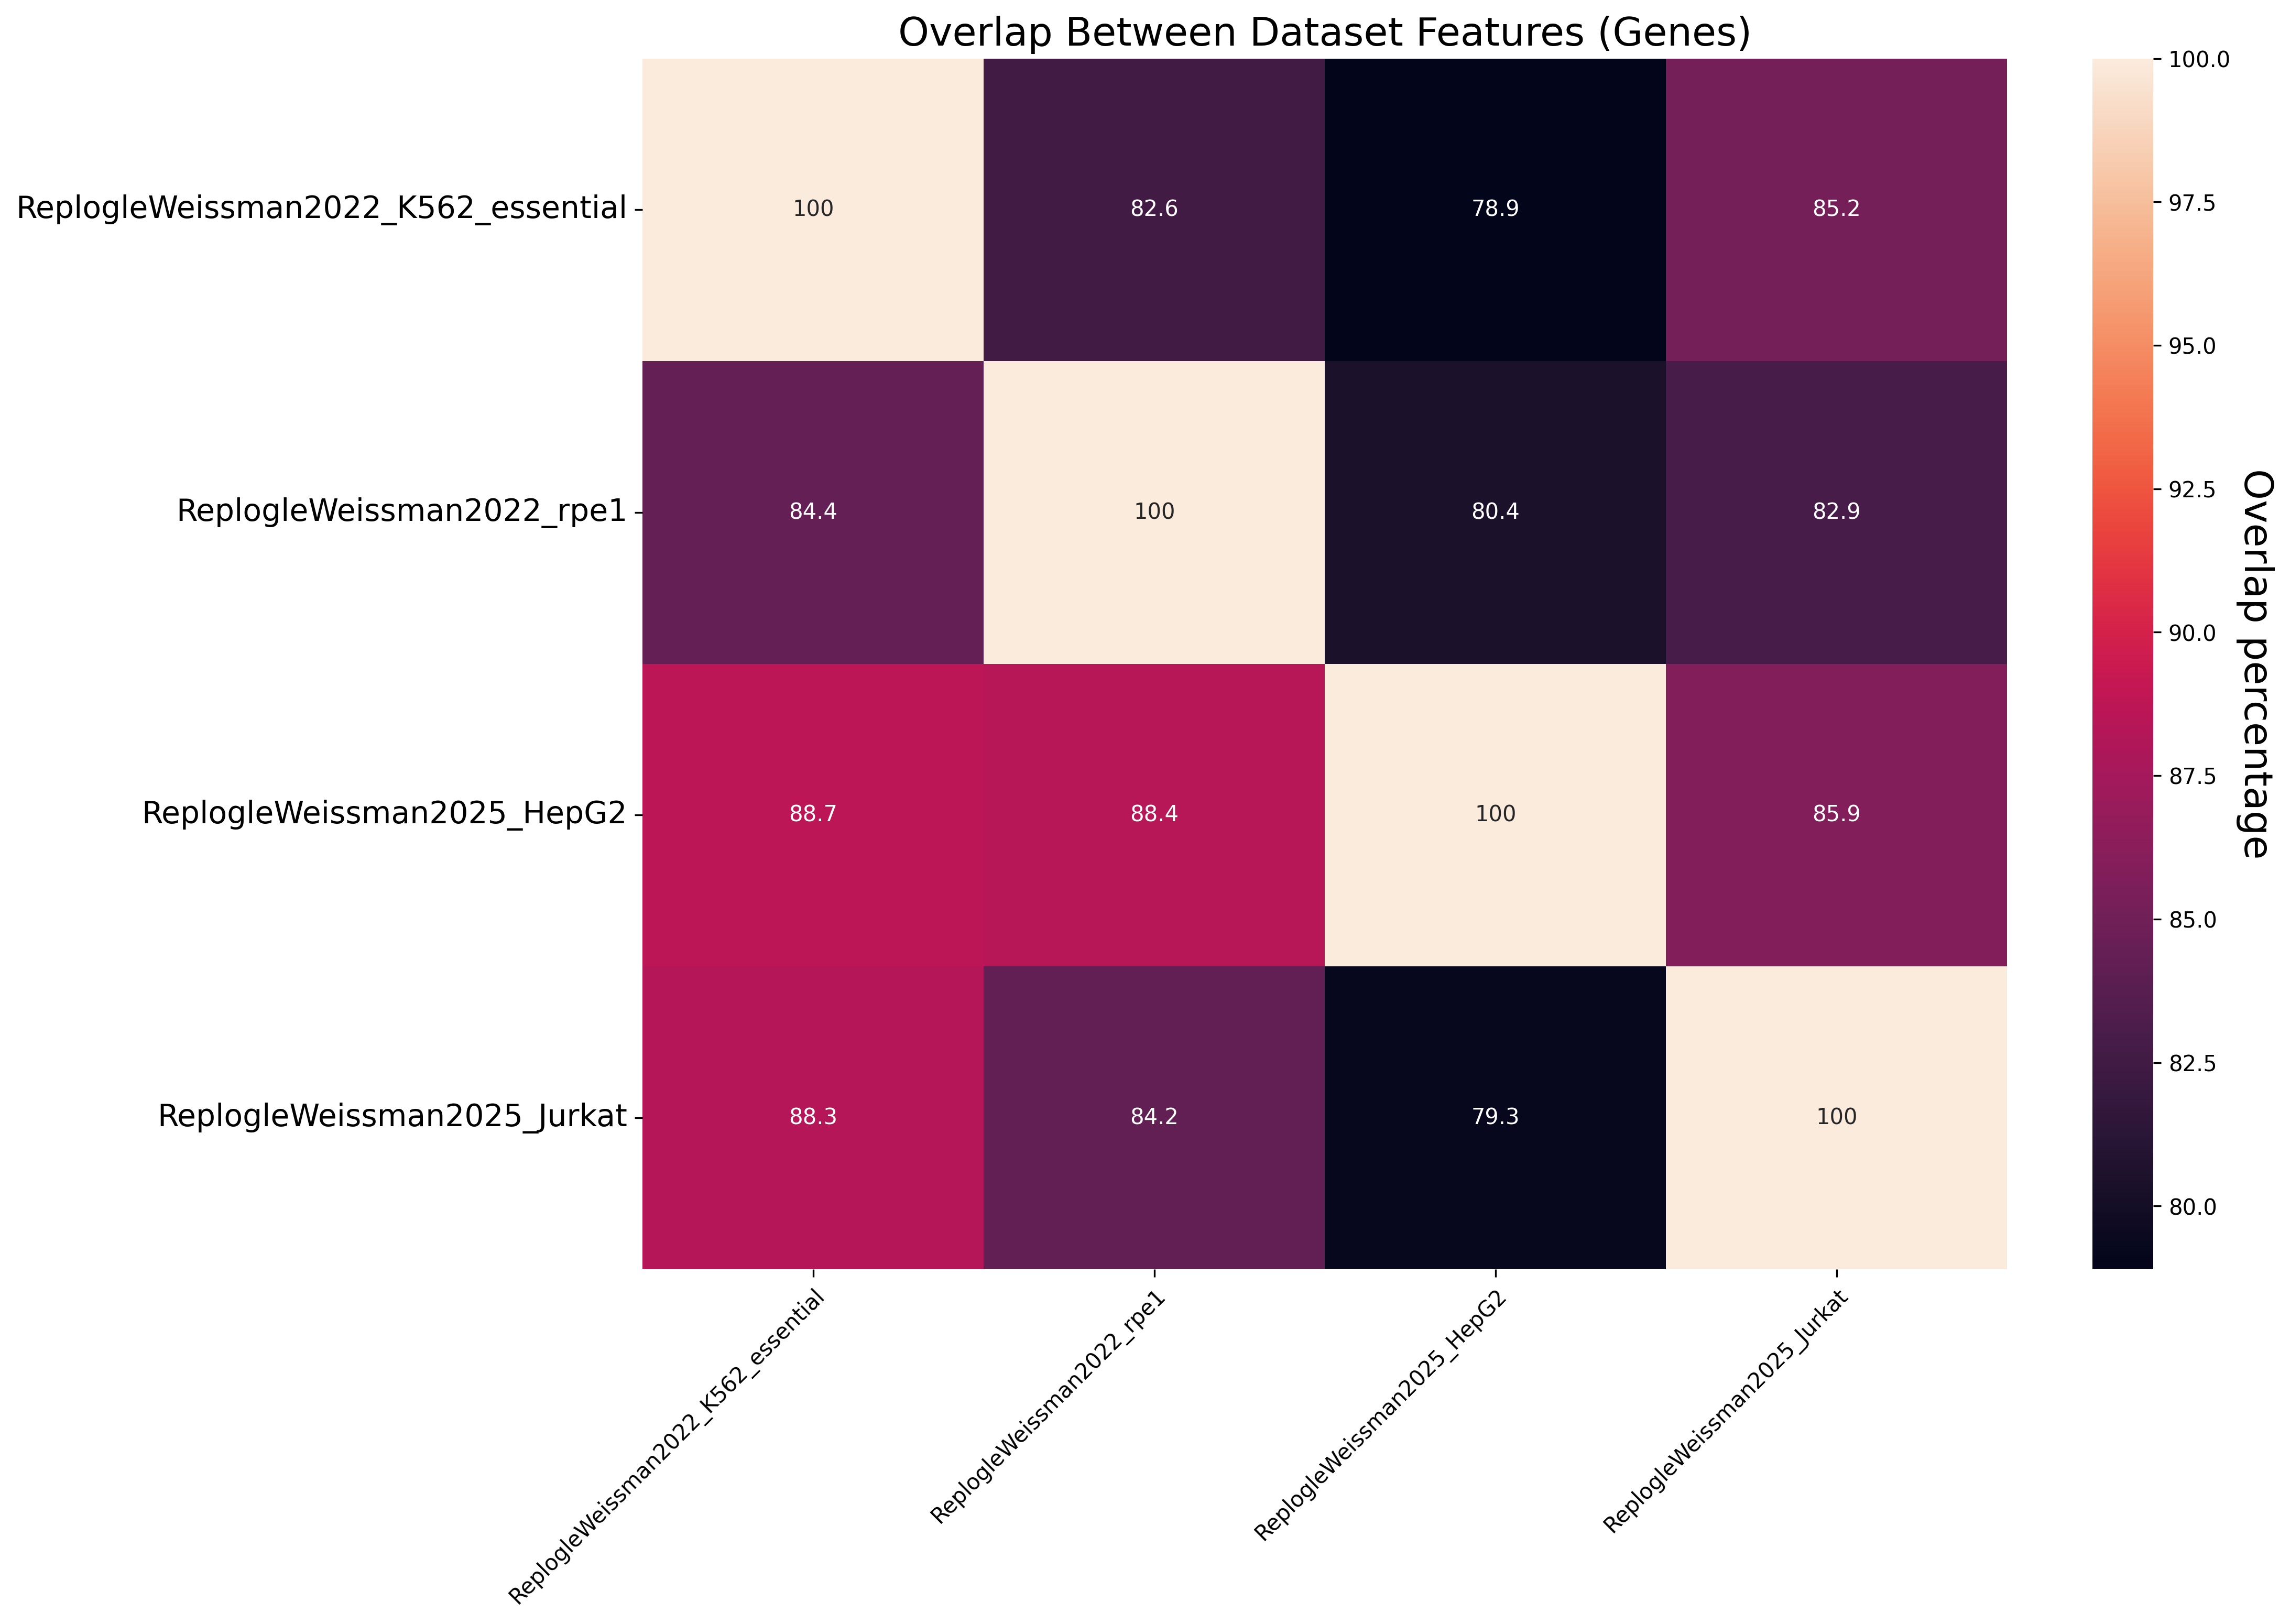

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# check overlap in genes

groups = np.arange(len(all_genes))
labels = names
unique_values = all_genes
overlap_matrix = np.zeros((len(groups), len(groups)))

for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        both = len(set(unique_values[group1]).intersection(unique_values[group2]))
        total = len(set(unique_values[group1]).union(set(unique_values[group2])))
        n_g1 = len(set(unique_values[group1]))
        n_g2 = len(set(unique_values[group2]))
        perc = np.round(both/n_g1*100, 1)
        overlap_matrix[i, j] = perc

# Create a heatmap
fig = plt.figure(dpi=300, figsize=(14,10))
ax = sns.heatmap(overlap_matrix.T, xticklabels=labels, yticklabels=labels, fmt='g', annot=True)
cbar = ax.collections[0].colorbar  # Get the colorbar object
cbar.set_label('Overlap percentage', rotation=270, labelpad=20, fontsize=18)
plt.title("Overlap Between Dataset Features (Genes)", fontsize=18)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
#plt.xticks([])
plt.yticks(fontsize=14)
plt.show()

In [7]:
# When selecting shared genes, take annotation from first dataset and mark the dataset
var = var[0].loc[sorted(list(intersection_genes)),:]

In [8]:
# Concatenate all cells
obs = pd.concat(obs)

/tmp/ipykernel_1495700/1770503851.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obs = pd.concat(obs)


In [9]:
from src.merge import merge

# Merge the datsets on shared genes
o = '/home/xlv0877/proj_home/dl/data/merge/345e5737384164e3/perturb_metaset_shared_features.h5ad'
merge(
    input_pths=filenames, out_pth=o, obs=obs, var=var, method='dask'
)

2025-07-07 09:59:51,840 - INFO - Adding /home/xlv0877/proj_home/dl/perturb-seq/data/processed/ReplogleWeissman2022_K562_essential.h5ad .X to meta-set
2025-07-07 10:00:49,532 - INFO - Adding /home/xlv0877/proj_home/dl/perturb-seq/data/processed/ReplogleWeissman2022_rpe1.h5ad .X to meta-set
2025-07-07 10:01:32,434 - INFO - Adding /home/xlv0877/proj_home/dl/perturb-seq/data/processed/ReplogleWeissman2025_HepG2.h5ad .X to meta-set
2025-07-07 10:02:08,299 - INFO - Adding /home/xlv0877/proj_home/dl/perturb-seq/data/processed/ReplogleWeissman2025_Jurkat.h5ad .X to meta-set
2025-07-07 10:03:00,048 - INFO - Stacking .X matrices
/home/xlv0877/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2025-07-07 10:03:00,186 - INFO - Saving metaset AnnData to /home/xlv0877/proj_home/dl/data/merge/345e5737384164e3/perturb_metaset_shared_features.h5ad
... s

IndexError: tuple index out of range

### Preliminary testing

In [34]:
x = datasets.sort_values('bytes').iloc[:3,].bytes.sum()
ref = 3.56

In [22]:
y = datasets.sort_values('bytes').iloc[:-1,].bytes.sum()

In [35]:
y/x * ref

130.81977261986592

In [24]:
datasets

,download link,publication index,dataset index,doi link,publication title,author,bytes,size,organisms,modality,...,perturbation,disease,cell type,tissue type,cancer,multiple_time_points,multiple_concentrations,combined_perturbations,date_of_submission,year
0,https://zenodo.org/record/7041849/files/Adamso...,AdamsonWeissman2016,GSM2406675_10X001,https://doi.org/10.1016/j.cell.2016.11.048,A multiplexed single-cell CRISPR screening pla...,Britt Adamson,34557246,32.96 MB,Homo sapiens,RNA,...,CRISPRi,Chronic myeloid leukemia,lymphoblasts,cell_line,y,n,n,n,01.10.2019,2019
1,https://zenodo.org/record/7041849/files/Adamso...,AdamsonWeissman2016,GSM2406677_10X005,https://doi.org/10.1016/j.cell.2016.11.048,A multiplexed single-cell CRISPR screening pla...,Britt Adamson,139059637,132.62 MB,Homo sapiens,RNA,...,CRISPRi,Chronic myeloid leukemia,lymphoblasts,cell_line,y,n,n,y,01.10.2019,2019
2,https://zenodo.org/record/7041849/files/Datlin...,DatlingerBock2021,NaN,https://doi.org/10.1038/s41592-021-01153-z,Ultra-high-throughput single-cell RNA sequenci...,Paul Datlinger,33600780,32.04 MB,Homo sapiens,RNA,...,"CRISPR-cas9, TCR stim",acute T cell leukemia,T cells,cell_line,y,n,n,y,01.12.2019,2019
3,https://zenodo.org/record/7041849/files/Gasper...,GasperiniShendure2019,atscale,https://doi.org/10.1016/j.cell.2018.11.029,A Genome-wide Framework for Mapping Gene Regul...,Molly Gasperini,1866293566,1.74 GB,Homo sapiens,RNA,...,CRISPRi,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.06.2018,2018
4,https://zenodo.org/record/7041849/files/Gasper...,GasperiniShendure2019,highMOI,https://doi.org/10.1016/j.cell.2018.11.029,A Genome-wide Framework for Mapping Gene Regul...,Molly Gasperini,418337592,398.96 MB,Homo sapiens,RNA,...,CRISPRi,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.06.2018,2018
5,https://zenodo.org/record/7041849/files/Gasper...,GasperiniShendure2019,lowMOI,https://doi.org/10.1016/j.cell.2018.11.029,A Genome-wide Framework for Mapping Gene Regul...,Molly Gasperini,322716827,307.77 MB,Homo sapiens,RNA,...,CRISPRi,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.06.2018,2018
6,https://zenodo.org/record/7041849/files/Norman...,NormanWeissman2019,filtered,https://doi.org/10.1126/science.aax4438,Exploring genetic interaction manifolds constr...,Thomas Norman,698680199,666.31 MB,Homo sapiens,RNA,...,CRISPRa,chronic myelogenous leukemia,lymphoblasts,cell_line,y,n,n,y,01.03.2019,2019
7,https://zenodo.org/record/7041849/files/Replog...,ReplogleWeissman2022,K562_essential,https://doi.org/10.1016/j.cell.2022.05.013,Mapping information-rich genotype-phenotype la...,Joseph Replogle,1546729675,1.44 GB,Homo sapiens,RNA,...,CRISPRi,chronic myeloid leukemia,lymphoblasts,cell_line,y,n,n,n,01.10.2022,2022
8,https://zenodo.org/record/7041849/files/Replog...,ReplogleWeissman2022,K562_gwps,https://doi.org/10.1016/j.cell.2022.05.013,Mapping information-rich genotype-phenotype la...,Joseph Replogle,8805466154,8.2 GB,Homo sapiens,RNA,...,CRISPRi,chronic myeloid leukemia,lymphoblasts,cell_line,y,n,n,n,01.10.2022,2022
9,https://zenodo.org/record/7041849/files/Replog...,ReplogleWeissman2022,rpe1,https://doi.org/10.1016/j.cell.2022.05.013,Mapping information-rich genotype-phenotype la...,Joseph Replogle,1236886900,1.15 GB,Homo sapiens,RNA,...,CRISPRi,chronic myeloid leukemia,epithelial,cell_line,n,n,n,n,01.10.2022,2022


In [36]:
y = (datasets[datasets['publication index']=='TianKampmann2021'].bytes.sum() + 
 datasets[datasets['dataset index']=='K562_essential'].bytes.sum() +
 datasets[datasets['publication index']=='NormanWeissman2019'].bytes.sum())
y/x*ref

46.20712598500833

Choose two sets to harmonize/merge and load:

In [3]:
# get pre-processed datasets
ds1 = sc.read('resources/datasets/data/AdamsonWeissman2016_GSM2406675_10X001.h5ad')
ds2 = sc.read('resources/datasets/data/DatlingerBock2021.h5ad')

2. Merge datasets

In [3]:
# define map of datasets to be merged, reduce to hvgs
ds_map = {
    'AdamsonWeissman2016_GSM2406675_10X001': ds1,
    'TianKampmann2021_CRISPRa.h5ad': ds2
}

In [3]:
pool = pd.read_csv('results/qc:True;scale:True;n_hvg:10000;subset_hvg:False;hvg:True;zero_padding:False;correction_method:skip/hvg_pool.csv', index_col=0)

In [4]:
def _filter(d, dataset_name, hvg_pool, zero_pad=True):
    # filter for pool of highly variable genes
    matching_hvgs = d.var_names.intersection(hvg_pool)
    print(f'Found {len(matching_hvgs)} pool genes in {dataset_name}')
    d = d[:, matching_hvgs]
    # check for missing genes
    missing_hvgs = set(hvg_pool) - set(matching_hvgs)
    if zero_pad and len(missing_hvgs) > 0:
        print(f'{len(missing_hvgs)} hvgs missing from pool; padding with zero values')
        # build zero matrix for missing genes
        zero_matrix = np.zeros((d.n_obs, len(missing_hvgs)))
        # define AnnData for missing genes
        ds_zeros = ad.AnnData(X=zero_matrix, var=pd.DataFrame(index=list(missing_hvgs)), obs=d.obs)
        # merge original and zero AnnData, keep original meta data for samples
        d = ad.concat([d, ds_zeros], axis=1, merge='first')
    else:
        print(f'{len(missing_hvgs)} hvgs lost from pool')
    return d


def _read_datasets(data_files, pool, hvg_filter=True, zero_pad=True):
    ds_dict = {}
    for file in data_files:
        if file.endswith('.h5ad'):
            print('Reading {}'.format(file))
            name = ''.join(os.path.basename(file).split('.')[:-1])
            adata = ad.read(file)
            # make cell barcodes unique to dataset
            adata.obs_names = adata.obs_names + ';' + name
            # apply hvg pool and zero-pad filters to dataset
            if hvg_filter:
                adata = _filter(adata, name, pool, zero_pad=zero_pad)
            # save dataset in dictionary
            ds_dict[name] = adata
    print(f'Finished reading {len(ds_dict)} datasets')
    return ds_dict

In [5]:
input_dir = 'resources/datasets/data'
data_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir)[:2]] 

In [6]:
ds_dict = _read_datasets(data_files, pool.index, hvg_filter=True, zero_pad=False)

Reading resources/datasets/data/DatlingerBock2021.h5ad
Found 18393 pool genes in DatlingerBock2021
19543 hvgs lost from pool
Reading resources/datasets/data/AdamsonWeissman2016_GSM2406677_10X005.h5ad
Found 30891 pool genes in AdamsonWeissman2016_GSM2406677_10X005
7045 hvgs lost from pool
Finished reading 2 datasets


In [10]:
# reduce datasets to common genes
ds_list = [*ds_dict.values()]
keys = [*ds_dict.keys()]
common_genes = list(set.intersection(*(set(adata.var_names) for adata in ds_list)))
print(len(common_genes))
ds_list = [d[:10000, common_genes[:3000]] for d in ds_list]

16124


In [9]:
import scanorama
corrected_data = scanorama.correct_scanpy(ds_list)

ERROR: Data sets must be numpy array or scipy.sparse.csr_matrix, received type <class 'anndata._core.views.SparseCSCView'>.


SystemExit: 1

/Users/leonschwartz/miniforge3/envs/ExPert/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [96]:
merged = ad.concat(corrected_data, label='dataset', keys=keys)

/Users/leonschwartz/miniforge3/envs/ExPert/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


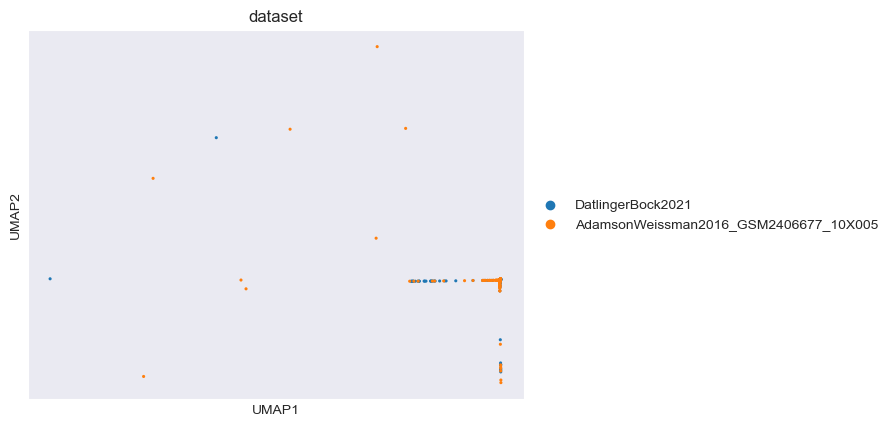

In [98]:
# Perform PCA for visualization
sc.pp.pca(merged)
# Visualize the batches in PCA space
sc.pp.neighbors(merged, use_rep='X_pca')
sc.tl.umap(merged)
sc.pl.umap(merged, color='dataset')

Visualize merged set without harmonization

3. Harmonize / batch effect correction
3.1 Harmonypy

In [264]:
metaset = sc.read('results/qc:True;n_hvg:10000;subset_hvg:False;hvg:True;zero_padding:True;correction_method:skip/perturb_metaset.h5ad')

In [20]:
scaled_metaset = sc.read('results/qc:True;scale:True;n_hvg:10000;subset_hvg:False;hvg:True;zero_padding:False;correction_method:skip/perturb_metaset.h5ad')

In [21]:
scaled_metaset

AnnData object with n_obs × n_vars = 55409 × 15794
    obs: 'cell_line', 'perturbation', 'tissue_type', 'cancer', 'celltype', 'disease', 'organism', 'perturbation_type', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'dataset'
    var: 'ensembl_id', 'hb', 'highly_variable', 'mt', 'ribo', 'dispersions', 'dispersions_norm', 'log1p_mean_counts', 'log1p_total_counts', 'mean_counts', 'means', 'n_cells_by_counts', 'ncells', 'ncounts', 'pct_dropout_by_counts', 'total_counts'

In [22]:
test = scaled_metaset.copy()

/Users/leonschwartz/miniforge3/envs/ExPert/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leonschwartz/miniforge3/envs/ExPert/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leonschwartz/miniforge3/envs/ExPert/lib/python3.8

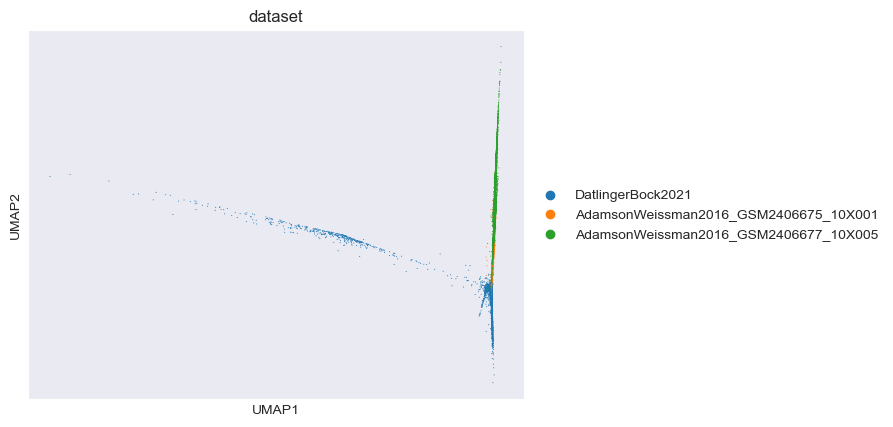

In [23]:
# Perform PCA for visualization
sc.pp.pca(test)
# Visualize the batches in PCA space
sc.pp.neighbors(test, use_rep='X_pca')
sc.tl.umap(test)
sc.pl.umap(test, color='dataset')

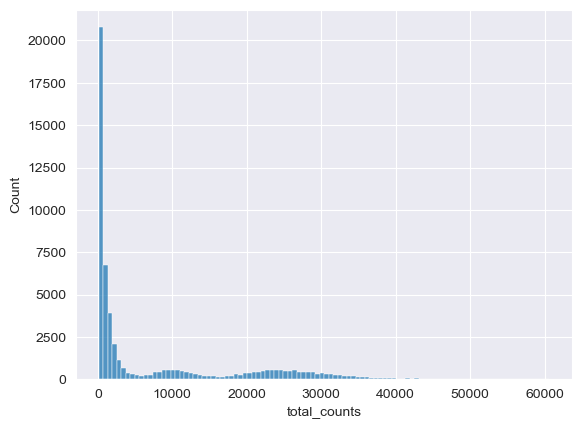

In [24]:
import seaborn as sns
import numpy as np
p3 = sns.histplot(test.obs["total_counts"], bins=100, kde=False)

In [25]:
test.obs['scaled_total_counts'] = np.array(test.X.sum(axis=1)).flatten()

Apply scaling and centering to each dataset

<AxesSubplot: xlabel='log1p_total_counts', ylabel='Count'>

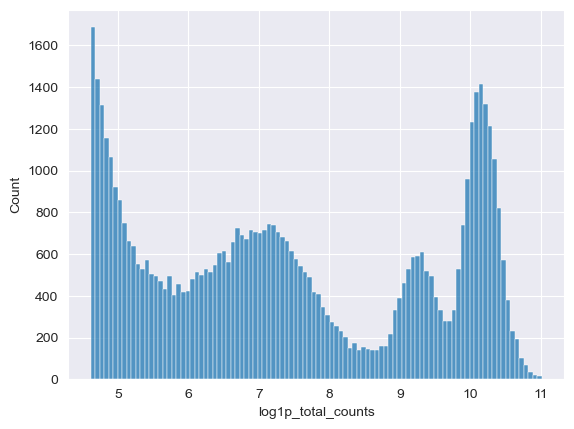

In [26]:
# Without scaling each dataset before merge
sns.histplot(test.obs['log1p_total_counts'], bins=100, kde=False)

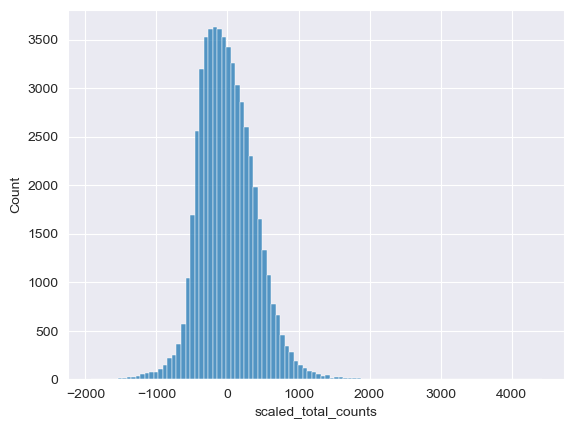

In [27]:
# With scaling and centering of each dataset before merge
p2 = sns.histplot(test.obs['scaled_total_counts'], bins=100, kde=False)

But, counts are a bit tight, try to transform and smoothen a bit

In [291]:
# tanh scaling
test.layers['tanh'] = np.tanh(test.X)

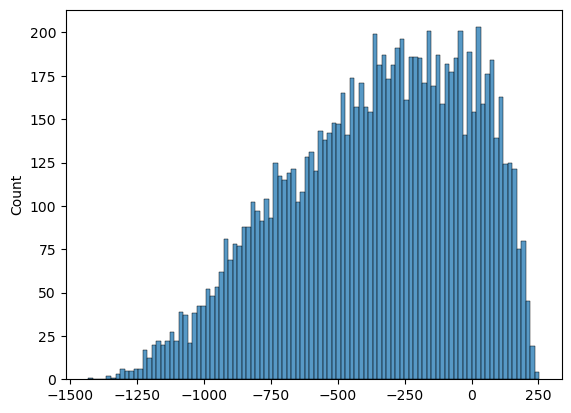

In [293]:
sns.histplot(np.array(test.layers['tanh'].sum(axis=1)).flatten(), bins=100, kde=False)

<AxesSubplot: ylabel='Count'>

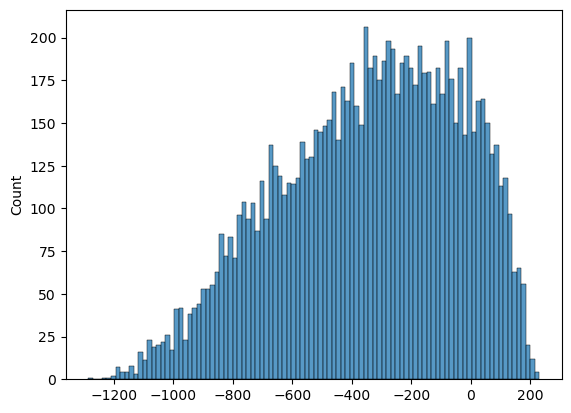

In [294]:
# Apply an exponential scaling (soft thresholding)
test.layers['scaled_log'] = np.sign(test.X) * np.log1p(np.abs(test.X))
sns.histplot(np.array(test.layers['scaled_log'].sum(axis=1)).flatten(), bins=100, kde=False)

<AxesSubplot: ylabel='Count'>

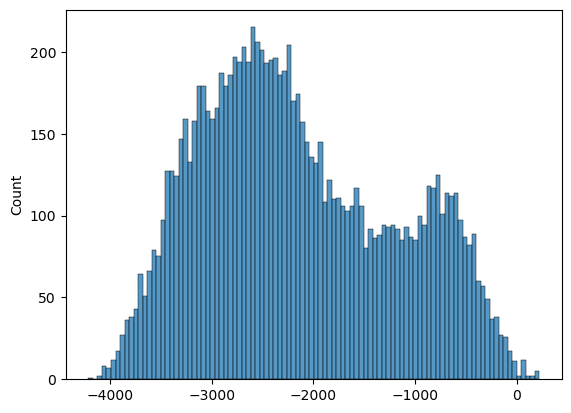

In [295]:
# Square root transformation to smooth out spiky values
test.layers['scaled_square'] = np.sign(test.X) * np.sqrt(np.abs(test.X))
sns.histplot(np.array(test.layers['scaled_square'].sum(axis=1)).flatten(), bins=100, kde=False)

Smoothing options transform data too much, generate multiple peaks, or have too many outliers, etc.
--> stick to regular scaled X